In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pytesseract
from PIL import Image
import easyocr
import keras_ocr

In [2]:
filenames = ["test_files/1.jpg", "test_files/2.jpg"]
images = [ Image.open(filename) for filename in filenames ]

## OCR Engines

In [3]:
# Initialise Easy OCR Reader
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
# Initialise Keras Pipeline
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /Users/aryan/.keras-ocr/craft_mlt_25k.h5
Metal device set to: Apple M1


2023-01-31 19:33:55.138759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 19:33:55.138788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Looking for /Users/aryan/.keras-ocr/crnn_kurapan.h5


In [5]:
tesseract_res = [ pytesseract.image_to_string(image) for image in images ]

In [6]:
easyocr_res = [ reader.readtext(image, paragraph=True) for image in images ]

In [7]:
keras_imgs = [ keras_ocr.tools.read(filename) for filename in filenames ]
keras_res = pipeline.recognize(keras_imgs)

2023-01-31 19:35:06.525378: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 19:35:06.885439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


2023-01-31 19:35:13.082892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



 1/30 [>.............................] - ETA: 46s

2023-01-31 19:35:13.627722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 19:35:13.647836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 19:35:13.707515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 19:35:13.719100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 10s 278ms/step


## Images

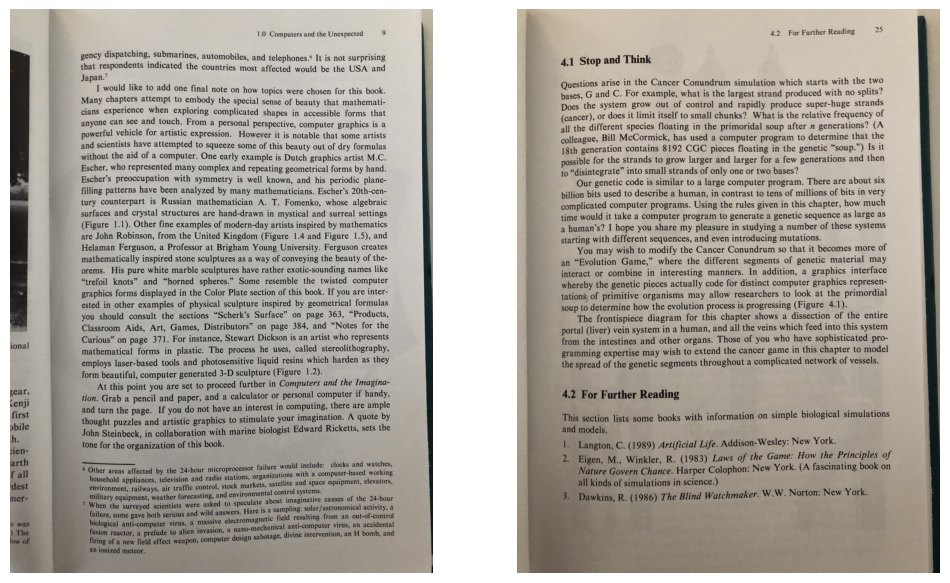

In [8]:
fig, axs = plt.subplots(1, len(images), figsize=(12, 12)) 

for key, image in enumerate(images):
    axs[key].imshow(image)
    axs[key].set_axis_off()
plt.show()

## Tesseract Results

In [9]:
tesseract_res

['ional\n\n1.0 Computers and the Unexpected 9\n\ngency dispatching, submarines, automobiles, and telephones.® It is not surprising\nthat pearumetise indicated the countries most affected would be the USA and\nJapan.’\n\nI would like to add one final note on how topics were chosen for this book.\nMany chapters attempt to embody the special sense of beauty that mathemati-\ncians experience when exploring complicated shapes in accessible forms that\nanyone can = and touch. From a personal perspective, computer graphics is a\npowerful vehicle for artistic expression. However it is notable that some artists\nand scientists have attempted to squeeze some of this beauty out of dry formulas\nwithout the aid of a computer. One early example is Dutch graphics artist M.C.\nEscher, who represented many complex and repeating geometrical forms by hand.\nEscher’s preoccupation with symmetry is well known, and his periodic plane-\nfilling patterns have been analyzed by many mathematicians. Escher’s 20

## EasyOCR Results

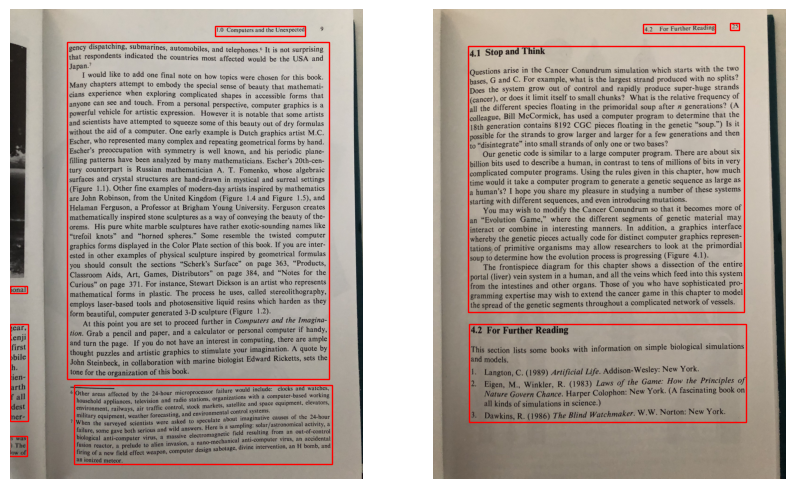

In [10]:
fig, axs = plt.subplots(ncols=len(images), figsize=(10, 10))

for key, ax in enumerate(axs):
    ax.imshow(images[key])
    
    for bbox, text in easyocr_res[key]:
        width = bbox[1][0] - bbox[0][0]
        height = bbox[3][1] - bbox[0][1]
        bottom_left_x, bottom_left_y = bbox[0]

        rect = patches.Rectangle(bbox[0], width, height, linewidth=1, edgecolor='r', facecolor='none')
        
        ax.add_patch(rect)
        ax.set_axis_off()

plt.show()

In [14]:
easyocr_text = [ " ".join([ text for bbox, text in page ]) for page in easyocr_res ]
easyocr_text

['1.0 Computers and the Unexpected gency dispatching; submarines, automobiles, and telephones: It is not surprising that respondents indicated the countries most affected would be the USA and Japan: I would like to add one final note o how topics were chosen for this book. Many chapters attempt to embody the special sense of beauty that mathemati- cians experience   when   exploring   complicated shapes in accessible  forms that anyone can see and touch: From a personal perspective, computer graphics is a powerful vehicle for artistic expression. However it is notable that some artists and scientists have attempted to squeeze some of this beauty out of dry formulas without the aid of a computer. One early example is Dutch graphics artist MC Escher; who represented many complex and repeating geometrical forms by hand: Escher\'s   preoccupation  with symmetry is well known, and his periodic plane- filling patterns have been analyzed by many mathematicians. Escher s 2Oth-cen- tury counter

## Keras Results

In [12]:
keras_text = [ " ".join([ text for text, bbox in img ]) for img in keras_res ]
keras_text

['1l0 unexpected computers and the dispatchings submarines gency automobiles surprising and telephones lt o is not respondents indicated the that countries and affected usa would the most be japan would like add to final l one note how on topics for this book chosen were chapters attempt to embody many the special of beauty mathemati that sense when experience exploring complicated cians shapes in accessible forms that and touch from see anyone can personal a perspective graphics is computer a vehicle for artistic powerful expression however it is notable that artists some scientists have attempted and to of squeeze this of some beauty dry formulas out aid of the one without a computer early example is dutch graphics artist mc represented who escher complex many and hand repeating geometrical forms by s preoccupation with escher symmetry is well periodic known and his plane have been patterns analyzed filling by eschers 2othcen mathematicians many is russian counterpart mathematician a